# Table of Contents
* [Project 5 Identify Fraud from Enron Email](#Project-5-Identify-Fraud-from-Enron-Email)
	* [Question 1: Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?](#Question-1:-Summarize-for-us-the-goal-of-this-project-and-how-machine-learning-is-useful-in-trying-to-accomplish-it.-As-part-of-your-answer,-give-some-background-on-the-dataset-and-how-it-can-be-used-to-answer-the-project-question.-Were-there-any-outliers-in-the-data-when-you-got-it,-and-how-did-you-handle-those?)
		* [Project Overview](#Project-Overview)
		* [Data Exploration](#Data-Exploration)
		* [Outliers](#Outliers)
	* [Question 2: What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.](#Question-2:-What-features-did-you-end-up-using-in-your-POI-identifier,-and-what-selection-process-did-you-use-to-pick-them?-Did-you-have-to-do-any-scaling?-Why-or-why-not?-As-part-of-the-assignment,-you-should-attempt-to-engineer-your-own-feature-that-does-not-come-ready-made-in-the-dataset----explain-what-feature-you-tried-to-make,-and-the-rationale-behind-it.-In-your-feature-selection-step,-if-you-used-an-algorithm-like-a-decision-tree,-please-also-give-the-feature-importances-of-the-features-that-you-use,-and-if-you-used-an-automated-feature-selection-function-like-SelectKBest,-please-report-the-feature-scores-and-reasons-for-your-choice-of-parameter-values.)
		* [Feature Selection](#Feature-Selection)
			* [Dealing with missing values](#Dealing-with-missing-values)
			* [New feature creation](#New-feature-creation)
			* [Feature scaling](#Feature-scaling)
		* [0.2.2 Trying a varity of classifiers](#0.2.2-Trying-a-varity-of-classifiers)
			* [0.2.2.1 Decision Trees](#0.2.2.1-Decision-Trees)
			* [0.2.2.2 Naive Bayes](#0.2.2.2-Naive-Bayes)
		* [0.2.3 Parameter Tuning](#0.2.3-Parameter-Tuning)
			* [0.2.3.1 Tuning features list](#0.2.3.1-Tuning-features-list)


# Project 5 Identify Fraud from Enron Email

## Question 1: Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

### Project Overview

Enron once was a one of the largest corporation in the energy sector. Fraudulent activities of upper management led Enron to collapse in 2002. 

In this project, I will be applying machine learning techniques to Enron dataset to identify persons of interest (POI) who may have committed fraud that lead to the Enron collapse. Enron dataset consists of financial and email data that was made publicly available after the Enron scandal.

There are 146 data points in the dataset that represent 146 upper management persons in the company. 18 persons out of the 146 are already identified as POIs. My goal will be to build a machine learning algorithms (POI identifier) based on financial and email data that is publicly available in the result of the Enron scandal. 

Machine learning is very useful in this kind of task as it can learn from the dataset, discover patterns in the data and classify new data based on the patterns.


In [66]:
###Importing libraries

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot
from tester import test_classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

In [3]:
###  Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Data Exploration

In [5]:
print  'Number of data points (persons) in the data set:', len(data_dict)

#Number of features for each person
num_features=0
for person in data_dict:
    num_features = len(data_dict[person])
    break
print 'Number of features for each person: ', num_features

#Number of POIs (persons of interest)
num_poi=0
for person in data_dict:
    if data_dict[person]["poi"]==1:
        num_poi+=1
        
print 'Number of POIs (persons of interest):', num_poi

Number of data points (persons) in the data set: 146
Number of features for each person:  21
Number of POIs (persons of interest): 18


### Outliers

Let's see if there are any outliers in the financial data. First, I want to plot salary and bonus.

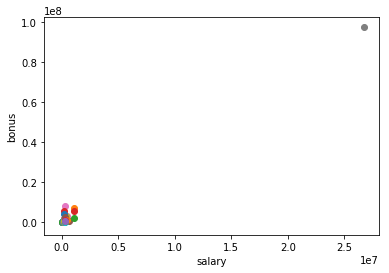

In [6]:
features = ['salary', 'bonus']

data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

From the graph above we see that there is a very extreme outlier. Now, I will investigate who the outlier is and remove him from the dataset

In [7]:
for person in data_dict:
    if data_dict[person]['salary']>2500000 and data_dict[person]['salary']!='NaN':
        print person

TOTAL


It appears that the data set has data point for total values. This data point should be removed.

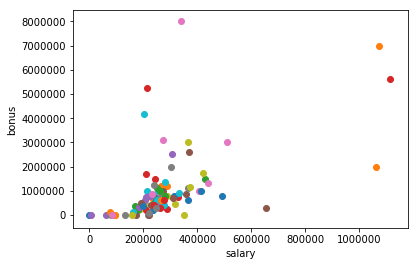

In [8]:
#Remove 'Total' value
data_dict.pop( "TOTAL", 0 ) 
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

Now, the plot looks much better. However, there are still some outliers. Let's investigate further.


In [41]:
for key, value in data_dict.iteritems():
    name = key
    salary = value["salary"]
    bonus = value["bonus"]
    poi = value['poi']
    if (salary!= 'NaN' and bonus!='NaN') and (int(salary)>= 800000 and int(bonus)>=3000000):
        print name, ' - POI? -', poi

LAY KENNETH L  - POI? - True
SKILLING JEFFREY K  - POI? - True


Even though LAY KENNETH L and SKILLING JEFFREY K are outliers we cannot remove them from the dataset since they are known POIs.

Having total value in the dataset made me curious if there are any non person data points in the set. Below I will output all the names to see any odd entries.

In [9]:
for key, value in data_dict.iteritems():
    name = key
    print name

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC

Looking through the names I noticed `THE TRAVEL AGENCY IN THE PARK` which does not seem to represent a person. Moreover, data for the The travel Agency is mostly NaNs. I am excluding `THE TRAVEL AGENCY IN THE PARK` from the datatset as well.

In [10]:
data_dict.pop( "THE TRAVEL AGENCY IN THE PARK", 0 ) 

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

## Question 2: What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.

### Feature Selection

####  Dealing with missing values

In [11]:
### Getting the list of all the features in the dataset
n=0
features=[]
for key, value in data_dict.iteritems():
    if n==0:
        features =  value.keys()
    n+=1
    
###Count how many NaN each feature has and output feature name + coun and how many missing values are related to POI or non POI
def countNaN(feature_name):
    count=0
    count_POI=0
    count_non_POI = 0
    for person in data_dict:
        if data_dict[person][feature_name] == 'NaN':
            count += 1
            if data_dict[person]['poi']==1:
                count_POI+=1
            elif data_dict[person]['poi']==0:
                count_non_POI+=1
    if count>0:           
        print 'Number of NaNs for', feature_name, ':', count
        print  "Percent of POI having NaNs:", round(100* count_POI/float(18),2), "%"
        print   "Percent of non POI having NaNs:", round(100* count_non_POI/float(146-18),2), "%"
        print "\n"
    
for f in features:
    countNaN(f)

Number of NaNs for salary : 50
Percent of POI having NaNs: 5.56 %
Percent of non POI having NaNs: 38.28 %


Number of NaNs for to_messages : 58
Percent of POI having NaNs: 22.22 %
Percent of non POI having NaNs: 42.19 %


Number of NaNs for deferral_payments : 106
Percent of POI having NaNs: 72.22 %
Percent of non POI having NaNs: 72.66 %


Number of NaNs for total_payments : 21
Percent of POI having NaNs: 0.0 %
Percent of non POI having NaNs: 16.41 %


Number of NaNs for exercised_stock_options : 43
Percent of POI having NaNs: 33.33 %
Percent of non POI having NaNs: 28.91 %


Number of NaNs for bonus : 63
Percent of POI having NaNs: 11.11 %
Percent of non POI having NaNs: 47.66 %


Number of NaNs for restricted_stock : 35
Percent of POI having NaNs: 5.56 %
Percent of non POI having NaNs: 26.56 %


Number of NaNs for shared_receipt_with_poi : 58
Percent of POI having NaNs: 22.22 %
Percent of non POI having NaNs: 42.19 %


Number of NaNs for restricted_stock_deferred : 127
Percent of PO

From above we see that there are several features with many missing values: `deferral_payments, restricted_stock_deferred, loan_advances,  director_fees ,deferred_income`. These features have around 100 and above missing values. Mentioned features will not be used in the algorithm since they do not contribute to finding patterns.

Moreover, features where missing values percent is very different between POI and non POI should also not be considered in the feature selection because the algorithm may identify a difference in NaN count as a pattern to distinguish a POI which is a wrong way to go. I will select only features having 30% or less difference between POI and not POI NaNs percentages. However, I will make an exclusion to this adding both salary and bonus to features list. This is solely based on my intuition since I believe that both salary and bonus are important features in this case.

Also, `email_address` should not be used as a feature because email is unique for each person and cannot be used to make distinction between POI or not POI. 

Preliminary feature list is below:


In [72]:
features_list_prelim = ['poi', 'salary', 'bonus', 'total_stock_value', 'exercised_stock_options', 'from_this_person_to_poi',
                 'from_poi_to_this_person', 'to_messages',  'long_term_incentive', 'shared_receipt_with_poi',
                        'from_messages',  'restricted_stock', 'total_payments']

#### New feature creation

Instead of using `from_this_person_to_poi` and `from_poi_to_this_person` directly I want to create 2 new features:
proportion of `from_this_person_to_poi` and `from_poi_to_this_person` in total emails. Absolute value of emails to/from POI does not make much sense by itself. If one person has sent 10 emails to POI but his total emails sent is 20 the proportion is 0.5. While another person has also sent 10 emails but the total number sent is 100 making the proration 0.1. The first person is communicating more often with POI even though their total count of emails to POI is the same.

In [73]:
for person in data_dict:
    if data_dict[person]['from_this_person_to_poi']!='NaN':
        data_dict[person]['from_this_person_to_poi_proportion'] \
        = int(data_dict[person]['from_this_person_to_poi'])/float(data_dict[person]['from_messages'])
    else:
        data_dict[person]['from_this_person_to_poi_proportion']='NaN'
        
        
    if data_dict[person]['from_poi_to_this_person']!='NaN':
        data_dict[person]['from_poi_to_this_person_proportion'] \
        = int(data_dict[person]['from_poi_to_this_person'])/float(data_dict[person]['to_messages'])
    else:
        data_dict[person]['from_poi_to_this_person_proportion']='NaN'

I will add 2 new created features to my preliminary features_list in place of  `'from_poi_to_this_person', 'from_this_person_to_poi'` because new created features are the better representation of volume of communication between person and POI.

In [74]:
features_list_prelim = ['poi', 'salary', 'bonus', 'total_stock_value', 'exercised_stock_options', 'from_this_person_to_poi_proportion',
                 'from_poi_to_this_person_proportion', 'to_messages',  'long_term_incentive', 'shared_receipt_with_poi',
                        'from_messages',  'restricted_stock', 'total_payments']

my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list_prelim, sort_keys = True)
labels, features = targetFeatureSplit(data)

Next, I am using Select K Best automated feature selection function on my preliminary list to further narrow down features used.

In [75]:
#Using k='all' do display all features
k_best = SelectKBest(k='all')
k_best.fit(features, labels)
for impt_num, impt in enumerate(k_best.scores_):
    print features_list_prelim[1+impt_num], impt

salary 18.2896840434
bonus 20.7922520472
total_stock_value 24.1828986786
exercised_stock_options 24.8150797332
from_this_person_to_poi_proportion 16.409712548
from_poi_to_this_person_proportion 3.12809174816
to_messages 1.64634112944
long_term_incentive 9.92218601319
shared_receipt_with_poi 8.58942073168
from_messages 0.169700947622
restricted_stock 9.21281062198
total_payments 8.77277773009


From the result above it is seen that `to_messages and from_messages` have the lowest scores. I will exclude these 2 features form my feature_list.

Also, newly created features `from_this_person_to_poi_proportion and from_poi_to_this_person_proportion` have significant score, therefore their creation is justified.

Final features list is below:

In [76]:
features_list = ['poi', 'salary', 'bonus', 'total_stock_value', 'exercised_stock_options', 'from_this_person_to_poi_proportion',
                 'from_poi_to_this_person_proportion', 'long_term_incentive', 'shared_receipt_with_poi','restricted_stock', 
                        'total_payments']

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Feature scaling

I am not preforming any feature scaling because the algorithm I will be using do not require feature scaling

## Question 3: What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  

### Trying a variety of classifiers

#### Decision Trees

In [77]:
##Splitting the data into train and test
features_train, features_test, labels_train, labels_test=train_test_split(features, labels, test_size=.3,random_state=42)

In [79]:
#Implementing Decision Tree Classifier
clf=tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)

pred=clf.predict(features_test)

#Using test_classifier from teater.py
test_classifier(clf, my_dataset, features_list, folds = 1000)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.82173	Precision: 0.31645	Recall: 0.29050	F1: 0.30292	F2: 0.29534
	Total predictions: 15000	True positives:  581	False positives: 1255	False negatives: 1419	True negatives: 11745



From above we see that the classifier has a pretty high accuracy score. However,recall is below 0.3.

In [80]:
# get a list of the relative importance of all the features being used
importances = clf.feature_importances_ 

for impt_num, impt in enumerate(clf.feature_importances_):
    position=impt_num
    print features_list[position+1], " - ", impt

salary  -  0.0
bonus  -  0.111111111111
total_stock_value  -  0.0907738095238
exercised_stock_options  -  0.229224489796
from_this_person_to_poi_proportion  -  0.126866365519
from_poi_to_this_person_proportion  -  0.0
long_term_incentive  -  0.104359925788
shared_receipt_with_poi  -  0.176406926407
restricted_stock  -  0.125543086141
total_payments  -  0.0357142857143


In the decision tree algoritm the most inportant features (having importance value>0) are salary, bonus, total_stock_value,
exercised_stock_options, from_this_person_to_poi_proportion, from_poi_to_this_person_proportion, shared_receipt_with_poi , other, restricted stock, total_payments.



#### Naive Bayes

In [81]:
clf = GaussianNB()
clf.fit(features_train, labels_train)

pred=clf.predict(features_test)

#Using test_classifier from teter.py
test_classifier(clf, my_dataset, features_list, folds = 1000)

GaussianNB(priors=None)
	Accuracy: 0.83313	Precision: 0.32547	Recall: 0.23450	F1: 0.27260	F2: 0.24838
	Total predictions: 15000	True positives:  469	False positives:  972	False negatives: 1531	True negatives: 12028



Naive Bayes while having a higher accuracy score has lower recall and F1 scores than Decision Tree algorithm. Precision are almost identical in both cases.

#### SVM

In [85]:
clf = SVC(kernel = "rbf")
#Using test_classifier from teter.py
test_classifier(clf, my_dataset, features_list, folds = 1000)

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


Support Vector Machines algortihm does not have enough true positives to make a prediction.

I will pick Naive Bayes as my final algorithm. I do not need feature scaling since Naive Bayes do not require scaling.

## Question 4: What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? 

### Parameter Tuning

In [268]:
param_grid = {'min_samples_split': np.arange(2, 15)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
clf.fit(features_train, labels_train)
print(clf.best_params_)

{'min_samples_split': 9}


Now run Decision Tree algorithm with suggested min_samples_split of 9


In [270]:
clf=tree.DecisionTreeClassifier(min_samples_split=9)
clf.fit(features_train, labels_train)

pred=clf.predict(features_test)

#Using test_classifier from teter.py
test_classifier(clf, my_dataset, features_list, folds = 1000)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.84073	Precision: 0.37635	Recall: 0.29600	F1: 0.33137	F2: 0.30920
	Total predictions: 15000	True positives:  592	False positives:  981	False negatives: 1408	True negatives: 12019



Using tuning of min_samples_split I got higher accuracy score, precision and F1./ Recall score is a bit lower (0.29)

#### 0.2.3.1 Tuning features list

After tunig the min_samples_szieoour recall score droped below 0,3. I will try tuing more to imporove it. I will use Select KBest features on featuresa an labels

In [290]:
k_best = SelectKBest(k='all')
k_best.fit(features, labels)
for impt_num, impt in enumerate(k_best_features.scores_):
    print features_list[1+impt_num], impt


salary 18.575703268
bonus 21.0600017075
total_stock_value 24.4676540475
exercised_stock_options 25.0975415287
from_this_person_to_poi_proportion 16.6417070705
from_poi_to_this_person_proportion 3.21076191697
to_messages 1.69882434858
expenses 6.23420114051
long_term_incentive 10.0724545294
shared_receipt_with_poi 8.74648553213
from_messages 0.164164498234
other 4.2049708583
restricted_stock 9.34670079105
total_payments 8.86672153711


I will use top 5 best features in my final features_list: exercised_stock_options ,total_stock_value,bonus ,salary ,from_this_person_to_poi_proportion

In [298]:
final_features = ['exercised_stock_options' , 'total_stock_value' , 'bonus' , 'salary', 'from_this_person_to_poi_proportion']
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

##Splitting the data into train and test
features_train, features_test, labels_train, labels_test=train_test_split(features, labels, test_size=.3,random_state=42)

clf=tree.DecisionTreeClassifier(min_samples_split=4)
clf.fit(features_train, labels_train)

pred=clf.predict(features_test)

#Using test_classifier from teter.py
test_classifier(clf, my_dataset, features_list, folds = 1000)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83427	Precision: 0.36224	Recall: 0.31950	F1: 0.33953	F2: 0.32722
	Total predictions: 15000	True positives:  639	False positives: 1125	False negatives: 1361	True negatives: 11875

